# **Project**

## **Libraries**

### **Importing Libraries**

In [1]:
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import os

## **Collect Data**

### **Original**

In [2]:
lung_original = None

original_path = os.path.join(os.getcwd(), "datasets/lung_survey_original.csv")

if os.path.isfile(original_path):
    lung_original = pd.read_csv(original_path)
    print("Dataset found locally.")

else:
    print("Dataset not found. Trying to access files online...")
    lung_original = pd.read_csv("https://raw.githubusercontent.com/crbsdndr/cancer_detection/refs/heads/main/datasets/lung_survey_original.csv")

    os.makedirs("datasets", exist_ok=True)
    lung_original.to_csv(original_path, index=False)
    print(f"Dataset successfully saved at: {original_path}")

Dataset found locally.


In [3]:
len(lung_original.columns)

16

In [4]:
lung_original.tail(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


#### **Data Information**

In [5]:
lung_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
print(f"Total missing values: {lung_original.isna().sum().sum()}")
print(f"Total duplicates: {lung_original.duplicated().sum()}")

Total missing values: 0
Total duplicates: 33


In [7]:
lung_original.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### **Synthetics**

In [8]:
lung_synthetics = None

synthetics_path = os.path.join(os.getcwd(), "datasets/lung_survey_synthetics.csv")

if os.path.isfile(synthetics_path):
    lung_synthetics = pd.read_csv(synthetics_path)
    print("Dataset found locally.")
else:
    print("Dataset not found. Trying to access files online...")
    lung_synthetics = pd.read_csv("https://raw.githubusercontent.com/crbsdndr/cancer_detection/refs/heads/main/datasets/lung_survey_synthetics.csv")

    os.makedirs("datasets", exist_ok=True)
    lung_synthetics.to_csv(synthetics_path, index=False)
    print(f"Dataset successfully saved at: {synthetics_path}")

Dataset found locally.


In [9]:
lung_synthetics.tail(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
797,F,96,1,1,2,2,2,2,1,1,2,1,1,2,1,YES
798,M,89,1,2,1,2,2,1,2,1,2,2,1,2,1,YES
799,F,94,2,1,2,1,1,1,2,1,1,2,2,2,2,YES


#### **Data Information**

In [10]:
lung_synthetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 800 non-null    object
 1   AGE                    800 non-null    int64 
 2   SMOKING                800 non-null    int64 
 3   YELLOW_FINGERS         800 non-null    int64 
 4   ANXIETY                800 non-null    int64 
 5   PEER_PRESSURE          800 non-null    int64 
 6   CHRONIC DISEASE        800 non-null    int64 
 7   FATIGUE                800 non-null    int64 
 8   ALLERGY                800 non-null    int64 
 9   WHEEZING               800 non-null    int64 
 10  ALCOHOL CONSUMING      800 non-null    int64 
 11  COUGHING               800 non-null    int64 
 12  SHORTNESS OF BREATH    800 non-null    int64 
 13  SWALLOWING DIFFICULTY  800 non-null    int64 
 14  CHEST PAIN             800 non-null    int64 
 15  LUNG_CANCER            

In [11]:
print(f"Total missing values: {lung_synthetics.isna().sum().sum()}")
print(f"Total duplicates: {lung_synthetics.duplicated().sum()}")

Total missing values: 0
Total duplicates: 8


In [12]:
lung_synthetics.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,49.633750,1.412500,1.397500,1.433750,1.421250,1.396250,1.437500,1.41500,1.410000,1.346250,1.43625,1.448750,1.416250,1.447500
std,26.724096,0.492592,0.489687,0.495902,0.494068,0.489423,0.496389,0.49303,0.492141,0.476072,0.49623,0.497678,0.493244,0.497547
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,25.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,52.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,76.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
max,99.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000


### **Combining**

In [13]:
x_original = lung_original.drop(columns=["LUNG_CANCER"])
y_original = lung_original["LUNG_CANCER"]

x_validation, x_test, y_validation, y_test = train_test_split(
    x_original, y_original,
    test_size=0.4,
    random_state=42,
    stratify=y_original
)

validation_data = pd.concat([x_validation, y_validation], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

test_data.to_csv("./datasets/lung_survey_test.csv", index=False)

del x_test, y_test, test_data,

## **Data Preprocessing**



### **Setting Up**

In [14]:
def format_(*, dataset):
    dataset_copy = dataset.copy()

    dataset_copy.columns = [column.strip().lower().replace(" ", "_") for column in dataset_copy.columns]
    print("Success")

    return dataset_copy

def drop_duplicates_(*, dataset):
    dataset_copy = dataset.copy()
    dataset_copy.drop_duplicates(inplace=True)
    dataset_copy.reset_index(drop=True, inplace=True)
    print("Success")

    print(f"Total duplicates: {dataset_copy.duplicated().sum()}")

    return dataset_copy

def scale(*, dataset, column_):
    dataset_copy = dataset.copy()

    scaler = MinMaxScaler()

    dataset_copy[column_] = scaler.fit_transform(dataset_copy[[column_]])

    print(f"Column {column_} succesfully scaled in the given dataset.")

    return scaler, dataset_copy

def encoding(*, dataset, column_):

    label_encoder = LabelEncoder()

    encoded_column = dataset[column_].copy()
    dataset[column_] = label_encoder.fit_transform(encoded_column)

    print(f"Column {column_} succesfully encoded in the given dataset.")
    return label_encoder, dataset

### **Clean Data**

In [15]:
lung_cleaned_train = lung_synthetics.copy()

lung_cleaned_train = drop_duplicates_(dataset=lung_cleaned_train)

lung_cleaned_validation = validation_data.copy()

lung_cleaned_validation = drop_duplicates_(dataset=lung_cleaned_validation)

Success
Total duplicates: 0
Success
Total duplicates: 0


### **Scaling**

In [18]:
lung_scaled_train = lung_cleaned_train.copy()

scaler, lung_scaled_train = scale(dataset=lung_scaled_train, column_="AGE")
lung_scaled_train[lung_scaled_train.drop(columns=["AGE", "LUNG_CANCER", "GENDER"]).columns] = lung_scaled_train[
    lung_scaled_train.drop(columns=["AGE", "LUNG_CANCER", "GENDER"]).columns
] - 1

lung_scaled_validation = lung_cleaned_validation.copy()

lung_scaled_validation["AGE"] = scaler.transform(lung_scaled_validation[["AGE"]])
print("Column age succesfully scaled in the given dataset.")
lung_scaled_validation[lung_scaled_validation.drop(columns=["AGE", "LUNG_CANCER", "GENDER"]).columns] = lung_scaled_validation[
    lung_scaled_validation.drop(columns=["AGE", "LUNG_CANCER", "GENDER"]).columns
] - 1

Column AGE succesfully scaled in the given dataset.
Column age succesfully scaled in the given dataset.


### **Encoding**

In [20]:
lung_encoded_train = lung_scaled_train.copy()

label_encoder, lung_encoded_train = encoding(dataset=lung_encoded_train, column_="LUNG_CANCER")

lung_encoded_validation = lung_scaled_validation.copy()

lung_encoded_validation["LUNG_CANCER"] = label_encoder.transform(lung_encoded_validation["LUNG_CANCER"])
print("Column LUNG_CANCER succesfully encoded in the given dataset.")

Column LUNG_CANCER succesfully encoded in the given dataset.
Column LUNG_CANCER succesfully encoded in the given dataset.


### **Action from Data Exploration**

In [21]:
lung_explored_train = lung_encoded_train.copy()
lung_explored_train.drop(
    columns=["GENDER"], inplace=True
)

lung_explored_validation = lung_encoded_validation.copy()
lung_explored_validation.drop(
    columns=["GENDER"], inplace=True
)

### **Format Data**

In [22]:
lung_formatted_train = lung_explored_train.copy()

lung_formatted_train = format_(dataset=lung_formatted_train)
print(f"Column name in the training data: {lung_formatted_train.columns}")

lung_formatted_validation = lung_explored_validation.copy()

lung_formatted_validation = format_(dataset=lung_formatted_validation)
print(f"Column name in the validation data: {lung_formatted_validation.columns}")

Success
Column name in the training data: Index(['age', 'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
       'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')
Success
Column name in the validation data: Index(['age', 'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
       'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')


## **Data Exploration**

### **Setting Up**

In [23]:
plt.style.use("dark_background")

In [24]:
def display_distribution(*, dataset, column_):
    plt.figure(figsize=(8, 4.8))
    sns.countplot(data=dataset, x=column_)
    plt.title(f"Distribution of '{column_}'")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def generate_boxplot(*, dataset, column_):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dataset, y=column_)
    sns.despine()
    plt.grid(linestyle="--", alpha=0.5)
    plt.show()

def create_scatter_plot(*, dataset, feature_x, feature_y):
    sns.scatterplot(data=dataset, x=feature_x, y=feature_y, alpha=0.7)
    plt.title(f"{feature_x} vs {feature_y}")
    plt.grid(True)
    plt.show()

def show_correlation_matrix(*, dataset):
    numeric_df = dataset.select_dtypes(include=np.number)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        numeric_df.corr(), annot=True, fmt=".2f",
        cmap="coolwarm", vmin=-1, vmax=1,
        cbar_kws={"label": "Correlation"}
    )
    plt.xticks(rotation=45, ha="right")
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

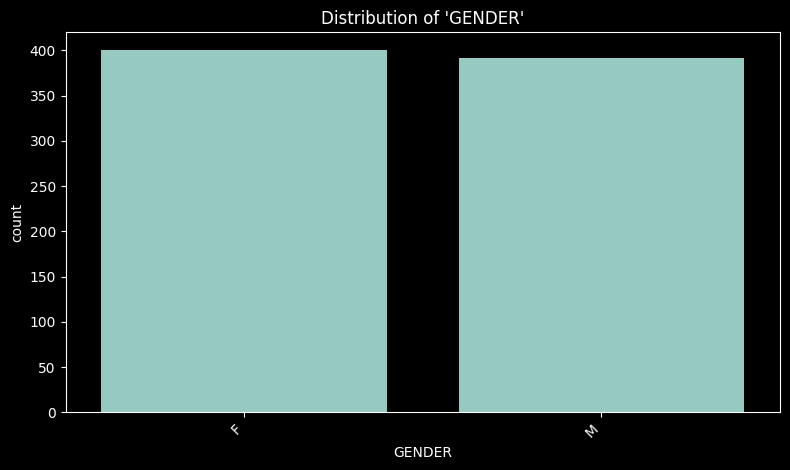

In [25]:
display_distribution(dataset=lung_cleaned_train, column_="GENDER")

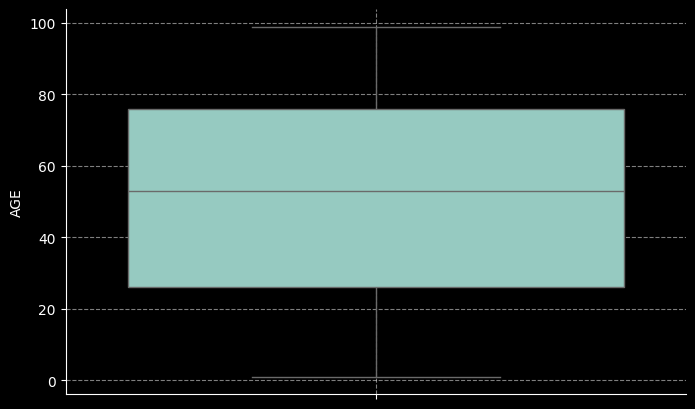

In [26]:
generate_boxplot(dataset=lung_cleaned_train, column_="AGE")

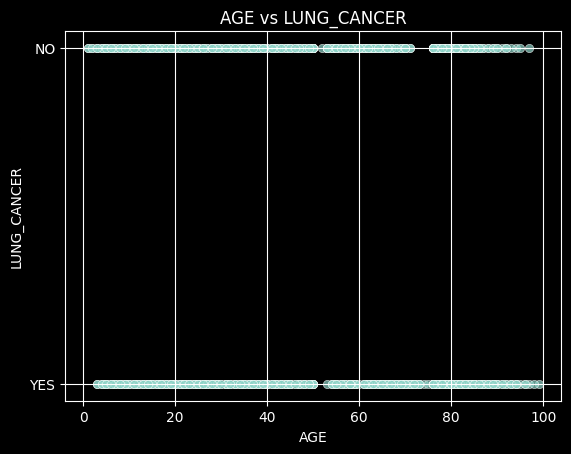

In [27]:
create_scatter_plot(dataset=lung_cleaned_train, feature_x="AGE", feature_y="LUNG_CANCER")

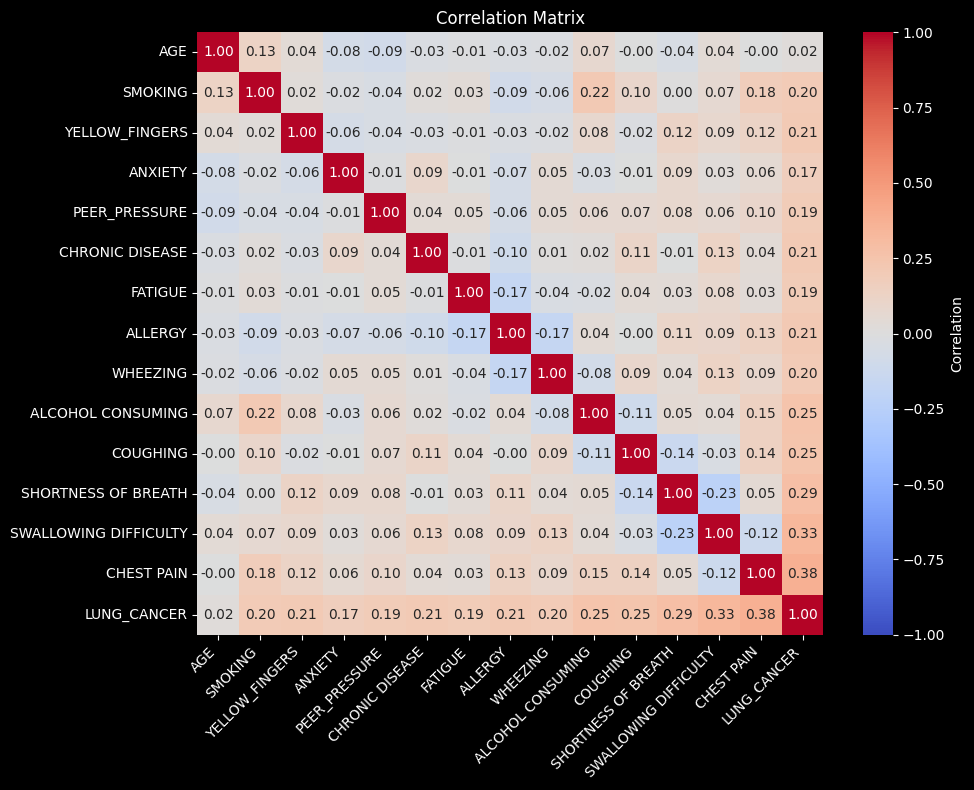

In [28]:
show_correlation_matrix(dataset=lung_explored_train)

## **Developing Model**

### **Setting Up**

In [29]:
def build_model(*,
    input_shape, hidden_units, dropout_rates,
    l1_reg, l2_reg=0.002, noise_stddev
):
    model = tf.keras.Sequential(name="MLP_Enhanced_v2")

    model.add(tf.keras.layers.Input(shape=input_shape))
    model.add(GaussianNoise(noise_stddev, name="input_noise"))

    for i, (units, dropout) in enumerate(zip(hidden_units, dropout_rates)):
        model.add(tf.keras.layers.Dense(
            units,
            activation='swish',
            kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg),
            name=f"Dense_L1L2_{i+1}"
        ))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(dropout))
        model.add(GaussianNoise(noise_stddev/2, name=f"hidden_noise_{i+1}"))

    model.add(tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=regularizers.l2(l2_reg)
    ))
    return model

def compile_model(*, model, max_lr, min_lr):
    lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
        initial_learning_rate=max_lr,
        first_decay_steps=200,
        t_mul=1.5,
        m_mul=0.85,
        alpha=min_lr/max_lr
    )

    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.2),
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc', curve='PR'),
            tf.keras.metrics.PrecisionAtRecall(0.8, name='precision_at_recall80')
        ]
    )

def get_callbacks(model):
    return [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=15,
            mode='max',
            baseline=0.94,
            restore_best_weights=True
        ),
        tf.keras.callbacks.TerminateOnNaN(),
        tf.keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: print(
                f"\nCurrent LR: {tf.keras.backend.get_value(model.optimizer.learning_rate):.6f}")
        )
    ]

def train_model(*, model, x_train, y_train, x_val, y_val, epochs, batch_size):
    pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
    class_weights = {0: 1.0, 1: pos_weight * 1.25}

    history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
        callbacks=get_callbacks(model),
        class_weight=class_weights,
        verbose=1
    )
    return history

def evaluate_model(*, model, x_test, y_test):
    y_prediction_probability = model.predict(x_test, verbose=0)

    y_prediction = (y_prediction_probability > 0.5).astype(int)

    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)[:2]

    report_dict = classification_report(y_test, y_prediction, output_dict=True, zero_division=0)
    recall_score = report_dict["weighted avg"]["recall"]

    conf_matrix = confusion_matrix(y_test, y_prediction)

    results = {
        "probability": y_prediction_probability,
        "accuracy": test_accuracy,
        "recall": recall_score,
        "loss": test_loss,
        "confusion_matrix": conf_matrix
    }
    return results

def plot_evaluation_results(results, class_names=None):
    conf_matrix = results["confusion_matrix"]
    accuracy = results["accuracy"]
    recall = results["recall"]
    loss = results["loss"]

    if class_names is None:
        class_names = [str(i) for i in range(conf_matrix.shape[0])]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(
        conf_matrix, annot=True, fmt='d', cmap="Blues",
        xticklabels=class_names, yticklabels=class_names, ax=axes[0]
    )
    axes[0].set_xlabel("Predicted Labels")
    axes[0].set_ylabel("True Labels")
    axes[0].set_title("Confusion Matrix")

    metric_names = ["Accuracy", "Recall", "Loss"]
    metric_values = [accuracy, recall, loss]
    colors = ["skyblue", "lightgreen", "lightcoral"]
    axes[1].bar(metric_names, metric_values, color=colors)
    axes[1].set_ylim(0, 1)
    axes[1].set_title("Model Evaluation Metrics")

    plt.tight_layout()
    plt.show()

### **Data Splitting**

In [30]:
x_train = lung_formatted_train.drop(columns=["lung_cancer"])
y_train = lung_formatted_train["lung_cancer"]

x_validation = lung_formatted_validation.drop(columns=["lung_cancer"])
y_validation = lung_formatted_validation["lung_cancer"]

### **Training**

In [31]:
model = build_model(
    input_shape=(x_train.shape[1],),
    hidden_units=[96, 48],
    dropout_rates=[0.6, 0.4],
    l1_reg=0.002,
    l2_reg=0.002,
    noise_stddev=0.1
)

model.summary()

Model: "MLP_Enhanced_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_noise (GaussianNoise)     │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_L1L2_1 (Dense)            │ (None, 96)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_noise_1 (GaussianNoise)  │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_L1L2_2 (Dense)            │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_noise_2 (GaussianNoise)  │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,721 (26.25 KB)

 Trainable params: 6,433 (25.13 KB)

 Non-trainable params: 288 (1.12 KB)

In [32]:
compile_model(model=model, max_lr=0.01, min_lr=1e-6)

In [33]:
history = train_model(
    model=model,
    x_train=x_train,
    y_train=y_train,
    x_val=x_validation,
    y_val=y_validation,
    epochs=300,
    batch_size=24
)

Epoch 1/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - auc: 0.7176 - loss: 2.0510 - precision_at_recall80: 0.6629
Current LR: 0.009343
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6815 - auc: 0.7206 - loss: 2.0449 - precision_at_recall80: 0.6653 - val_accuracy: 0.8671 - val_auc: 0.9912 - val_loss: 1.3890 - val_precision_at_recall80: 0.9919
Epoch 2/300
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8750 - auc: 0.8731 - loss: 1.5233 - precision_at_recall80: 0.8462
Current LR: 0.007545
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - auc: 0.9052 - loss: 1.4027 - precision_at_recall80: 0.8625 - val_accuracy: 0.8613 - val_auc: 0.9910 - val_loss: 1.1037 - val_precision_at_recall80: 0.9845
Epoch 3/300
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - auc: 0.9494 - loss: 1.0797 - precision_at_recall80: 0.8333
Current LR: 0.005079
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8654 - auc: 0.9380 - loss: 1.0623 - precision_at_recall80:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9213 - auc: 0.9931 - loss: 0.5974 - precision_at_recall80: 1.0000 


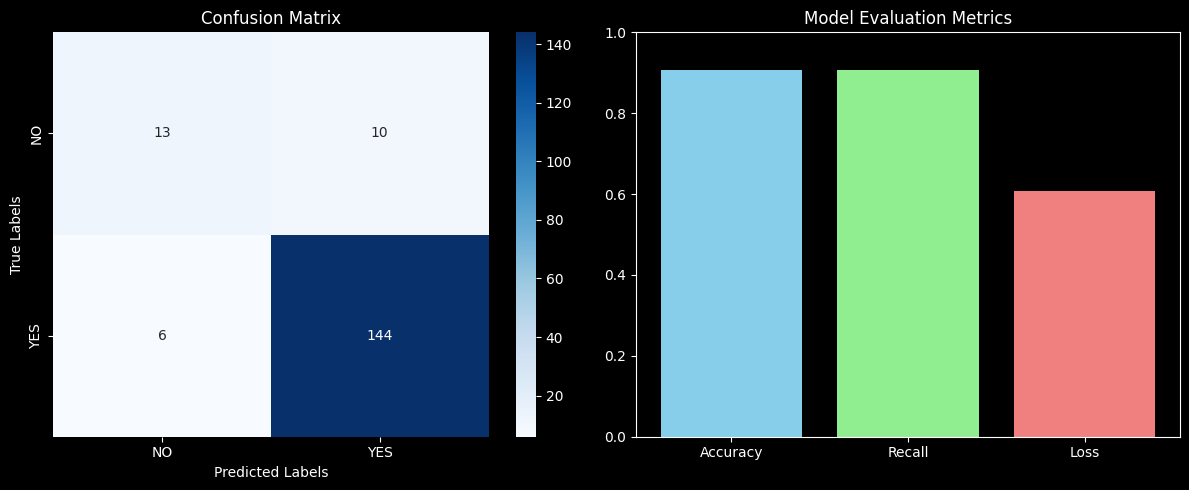

In [34]:
plot_evaluation_results(
    results=evaluate_model(model=model, x_test=x_validation, y_test=y_validation),
    class_names=np.unique(label_encoder.inverse_transform(y_train))
)

In [35]:
MODEL_PATH = "models/cancer_detection_model.keras"

os.makedirs("models", exist_ok=True)
model.save(MODEL_PATH)